# Trabalho 1 - Viga com carga móvel


Considere uma Viga simplesmente apoiada de massa desprezável com um vão L, sujeita a uma carga móvel de massa **M = P/g** que a atravessa a uma velocidade constante $v_{c}$. O deslocamento vertical da carga móvel (idêntico à deformação transversal da viga no ponto de aplicação da carga) é para o instante **t** definido por:

$$ w(t) = \left [ P-M\frac{\mathrm{d^2}w(t) }{\mathrm{d} t^2} \right ]* \frac{v_{c}^{2}*t^{2}*(L-vc*t)^{2}}{3EIL}$$

Em que **EI** corresponde à rigidez de flexão da secção transversal da viga.
Admita as seguintes condições iniciais:

$$w(t_{0})=w_{0}$$

$${w}''(t_{0})=\frac{\mathrm{d}^{2}w }{\mathrm{d} t^{2}}(t_{0})=v_{0}$$

Escreva e implemente um algoritmo numérico para a resolução numérica da equação diferencial.

Considere como dados: **M,P,$v_{c}$,EI,L,$v_{0}$,$t_{0}$ e $t_{f}$**

Apresente como resultados, $w(t)$ e ${w}''(t)$ entre $t_{0}$ e $t_{f}$

Colocando a equação em ordem a segunda derivada:
   
    


 $$\frac{\mathrm{d}^{2}w }{\mathrm{d} t^{2}} = \left [\frac{P-w*3EIL }{v_{c}^{2} t^2(L-v_{c}t)^2} \right ]* \frac{1}{M}$$
 
Que é equivalente a:
    
     
    

$$\frac{\mathrm{d}^{2}w }{\mathrm{d} t^{2}} =- w\frac{3EIL}{v_{c}^{2} t^2(L-v_{c}t)^2}\frac{1}{M} + \left [\frac{P }{v_{c}^{2} t^2(L-v_{c}t)^2} \right ]* \frac{1}{M}$$

fazendo a substitiuição:
$$\frac{\mathrm{d}w}{\mathrm{d} t} = z$$
temos que,
$$\frac{\mathrm{d}^{2}w}{\mathrm{d} t^{2}} = \frac{\mathrm{d}z}{\mathrm{d} t}$$

e logo ficamos com um sistema de duas equações ordinarias de primeira ordem para resolver:




$$
\left\{\begin{matrix}
\frac{\mathrm{d}w}{\mathrm{d} t} = z = f(t,w,z) \\  \frac{\mathrm{d}z}{\mathrm{d} t} =  \left [P  - w\frac{3EIL}{v_{c}^{2} t^2(L-v_{c}t)^2} \right ]* \frac{1}{M} = g(t,w,z)
\end{matrix}\right.
$$

Para resolver este sistema, podemos utilizar o método de Runge-Kutta de 2ª ordem.
Os métodos de Runge-Kutta são caracterizados por três propriedades:

1. são de passo um;
2. não exigem o cálculo de qualquer derivada de f(x,y); pagam, por isso, o preço de calcular f(x,y) em vários pontos;
3. após expandir f(x,y) por Taylor para função de duas variáveis  em torno de ($x_n,y_n$) e agrupar os termos semelhantes, sua expressão coincide com a do método de Taylor da mesma ordem.


No método Runge-Kutta de 2ª Ordem, também conhecido como método de Heun's a equação é:
$$y_{i+1}=y_{i}+\frac{h}{2}(k_{1}+k_{2})$$
com,
$$k_{1}=f(t_{i},y_{i})$$
$$k_{2}=f(t_{i}+h,y_{i}+hk_{1})$$


In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Definir dados iniciais

p = float(input('Informe o valor da carga móvel aplicada, P,  em Newtons: '))
g = 9.91  #m/s2
m = p/g  #N
e = float(input('Informe o Módulo de Elasticidade, E, em Mpa: '))
i = float(input('Informe o momento de inércia, I, em mm^4: '))
l = float(input('Informe o comprimento da viga, L, em metros: '))
vc = float(input('Indique a velocidade constante com que a carga se desloca, vc, em metros por segundos: '))
t0 = float(input('Indique o primeiro instante, t0, em segundos: '))
tf = float(input('Indique o instante final, tf, em segundos: '))

#Definir condições iniciais

w0 = float(input('Indique o deslocamento inicial, W(t0), em metros: '))
v0 = float(input('Indique a velocidade inicial, v(t0), em metros por segundos: '))
step = float(input('Indique o valor do passo: '))

#t=np.arange(t0,step,tf)
nstep = int((tf-t0)/step)


        

Informe o valor da carga móvel aplicada, P,  em Newtons: 100
Informe o Módulo de Elasticidade, E, em Mpa: 200
Informe o momento de inércia, I, em mm^4: 40000
Informe o comprimento da viga, L, em metros: 5
Indique a velocidade constante com que a carga se desloca, vc, em metros por segundos: 5
Indique o primeiro instante, t0, em segundos: 0
Indique o instante final, tf, em segundos: 12
Indique o deslocamento inicial, W(t0), em metros: 0
Indique a velocidade inicial, v(t0), em metros por segundos: 0
Indique o valor do passo: 0.1


In [9]:
t = np.linspace(t0, tf, nstep)
n = t.shape[0]



In [12]:
w = np.zeros([nstep,1])
w_der = np.zeros([nstep,1])

    

In [13]:
w[0]=w0
w_der[0]=v0
# nao entrei com a derivada em lado nenhum,
# nao estou a resolver bem a equação

In [14]:
for i in range(1,nstep-1):
    k1 = ((p-w[i]*3*e*i*l)/(vc**2*t[i]**2*(l-vc*t[i])**2))*1/m
    tnew = t[i]+step
    wnew = w[i]+step*k1
    k2 = ((p-wnew*3*e*i*l)/(vc**2*tnew**2*(l-vc*tnew)**2))*1/m
    w[i+1] = w[i] + step/2*(k1+k2)
    
    

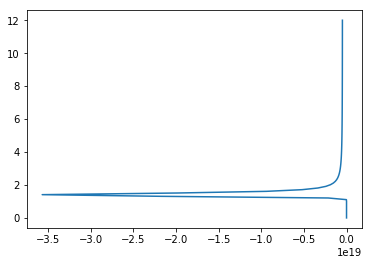

In [15]:
plt.plot(w,t)